#Movie Rating Prediction with Python

This notebook explores building a model to predict movie ratings using Python. By analyzing historical movie data and leveraging machine learning techniques, we aim to develop a model that accurately estimates ratings based on features like genre, director, and actors. Through this project, we'll delve into data analysis, preprocessing, feature engineering, and model building, providing insights into factors influencing movie ratings and demonstrating Python's capabilities in predictive analytic

In [31]:
# Step 1: Load necessary libraries
import pandas as pd

# Step 2: Load the dataset with a different encoding and correct delimiter
data = pd.read_csv("/content/IMDb Movies India.csv", delimiter=',', encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(data.head())

# Step 3: Check for missing values and data types
print(data.info())

# Step 4: Statistical summary
print(data.describe())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [32]:
# Step 1: Handle Missing Values

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values
# For numeric columns like Rating and Votes, we may replace missing values with mean or median
data['Rating'].fillna(data['Rating'].median(), inplace=True)

# For categorical columns like Year, Duration, Genre, Director, Actor 1, Actor 2, and Actor 3,
# we may replace missing values with mode (most frequent value) or a placeholder value
categorical_columns = ['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Since 'Votes' represent the number of votes, it might not be appropriate to fill missing values with mean or median
# We can fill missing values with 0 or a placeholder value to indicate that there are no votes for those entries
data['Votes'].fillna(0, inplace=True)

# Verify that missing values have been handled
print("\nMissing Values after handling:\n", data.isnull().sum())

# Step 2: Convert Data Types

# Convert 'Year' column to numeric
data['Year'] = pd.to_numeric(data['Year'].str.replace('(','').str.replace(')',''), errors='coerce')

# Convert 'Votes' column to numeric after removing commas
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',',''), errors='coerce')

# Display the first few rows of the dataset after preprocessing
print("\nFirst few rows of the dataset after preprocessing:\n", data.head())


Missing Values:
 Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Missing Values after handling:
 Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

First few rows of the dataset after preprocessing:
                                  Name  Year Duration            Genre  Rating  \
0                                      2019  120 min            Drama     6.0   
1  #Gadhvi (He thought he was Gandhi)  2019  109 min            Drama     7.0   
2                         #Homecoming  2021   90 min   Drama, Musical     6.0   
3                             #Yaaram  2019  110 min  Comedy, Romance     4.4   
4                   ...And Once Again  2010  105 min            Drama     6.0   

   Votes            Director       Actor 1             Actor 2  \
0    NaN

Summary Statistics for 'Rating':
count    15509.000000
mean         5.919131
std          0.990512
min          1.100000
25%          6.000000
50%          6.000000
75%          6.000000
max         10.000000
Name: Rating, dtype: float64

Summary Statistics for 'Votes':
count      7919.000000
mean       1938.520394
std       11602.415952
min           5.000000
25%          16.000000
50%          55.000000
75%         404.000000
max      591417.000000
Name: Votes, dtype: float64


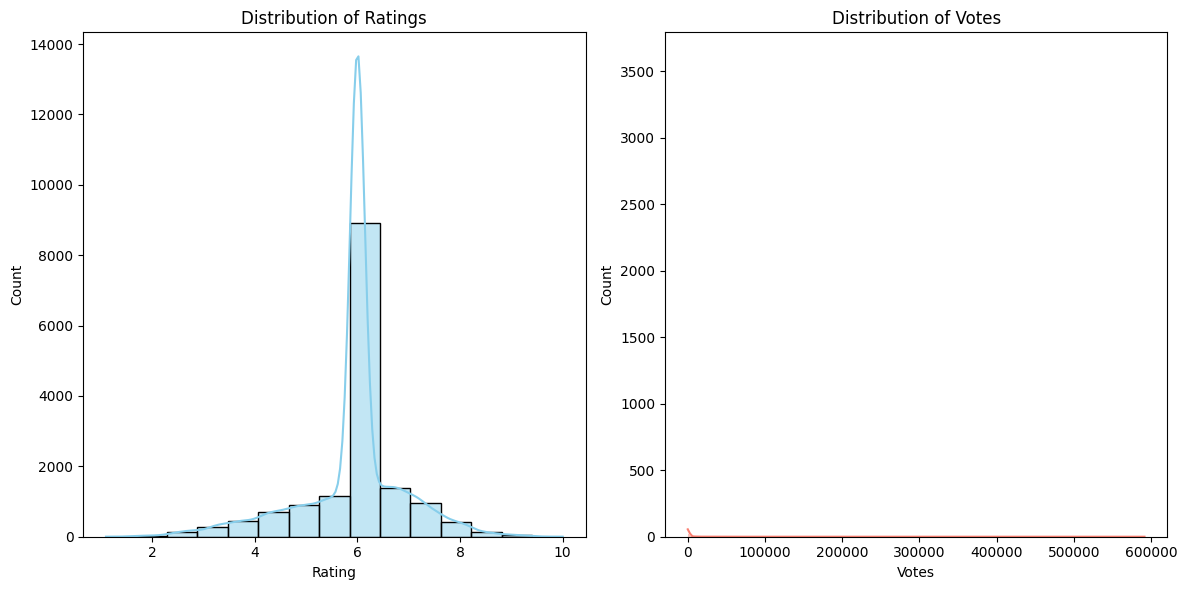

<ipython-input-33-d4938c87eef2>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=data, order=data['Genre'].value_counts().index[:10], palette='pastel')
<ipython-input-33-d4938c87eef2>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Director', data=data, order=data['Director'].value_counts().index[:10], palette='pastel')
<ipython-input-33-d4938c87eef2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Actor 1', data=data, order=data['Actor 1'].value_counts().index[:10], palette='pastel')
<ipython-input-33-d4938c

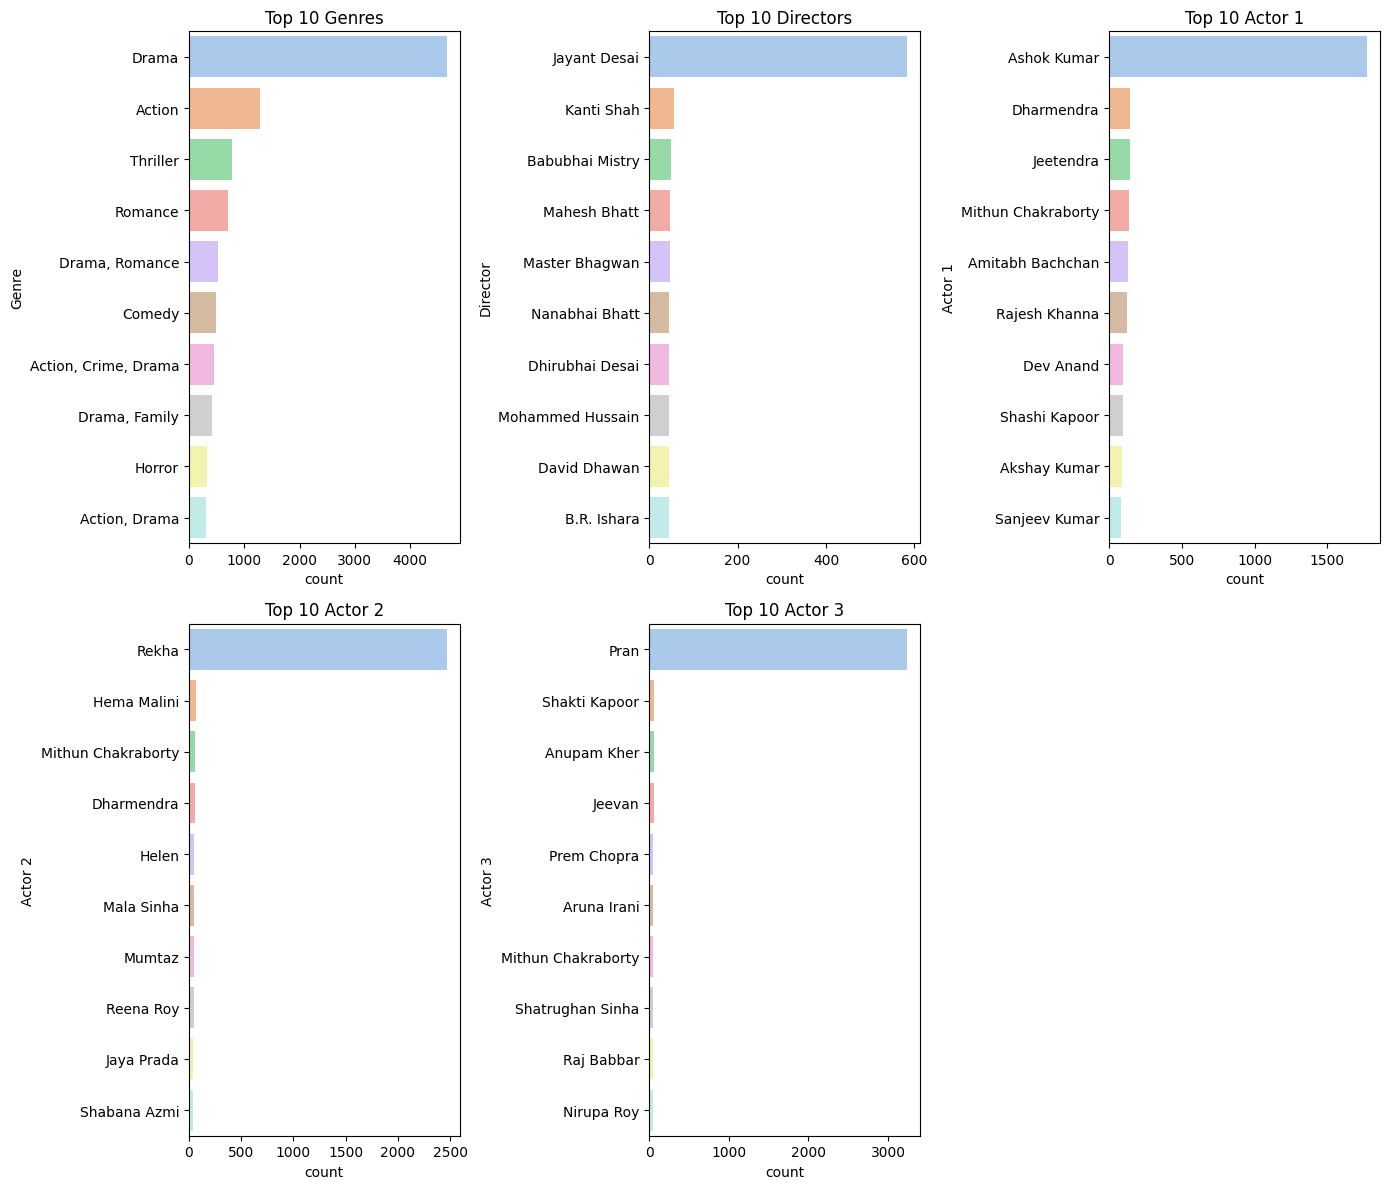

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numeric features
print("Summary Statistics for 'Rating':")
print(data['Rating'].describe())

print("\nSummary Statistics for 'Votes':")
print(data['Votes'].describe())

# Distribution plots for 'Rating' and 'Votes'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Rating'], kde=True, color='skyblue')
plt.title('Distribution of Ratings')

plt.subplot(1, 2, 2)
sns.histplot(data['Votes'], kde=True, color='salmon')
plt.title('Distribution of Votes')

plt.tight_layout()
plt.show()

# Count plots for categorical features
plt.figure(figsize=(14, 12))

plt.subplot(2, 3, 1)
sns.countplot(y='Genre', data=data, order=data['Genre'].value_counts().index[:10], palette='pastel')
plt.title('Top 10 Genres')

plt.subplot(2, 3, 2)
sns.countplot(y='Director', data=data, order=data['Director'].value_counts().index[:10], palette='pastel')
plt.title('Top 10 Directors')

plt.subplot(2, 3, 3)
sns.countplot(y='Actor 1', data=data, order=data['Actor 1'].value_counts().index[:10], palette='pastel')
plt.title('Top 10 Actor 1')

plt.subplot(2, 3, 4)
sns.countplot(y='Actor 2', data=data, order=data['Actor 2'].value_counts().index[:10], palette='pastel')
plt.title('Top 10 Actor 2')

plt.subplot(2, 3, 5)
sns.countplot(y='Actor 3', data=data, order=data['Actor 3'].value_counts().index[:10], palette='pastel')
plt.title('Top 10 Actor 3')

plt.tight_layout()
plt.show()


<ipython-input-34-8b5bd6531165>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=data, order=data['Genre'].value_counts().index[:20], palette='pastel')


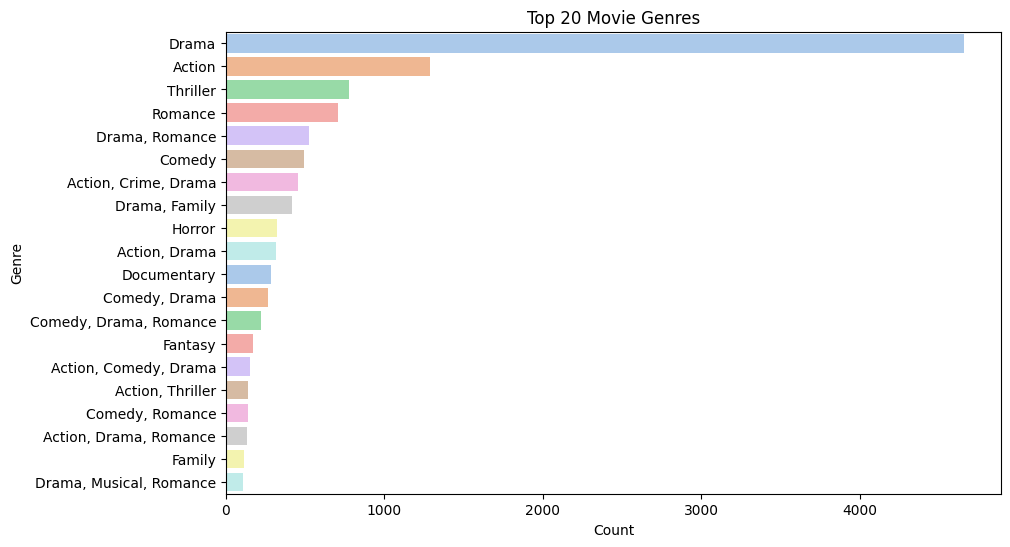

<ipython-input-34-8b5bd6531165>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genre_ratings.values()), y=list(genre_ratings.keys()), palette='pastel', orient='h')


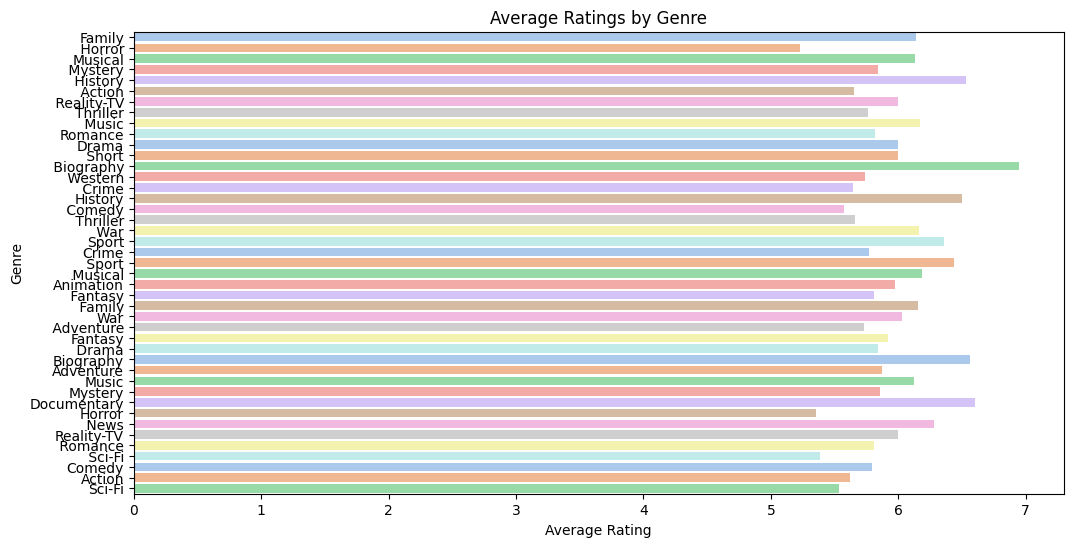

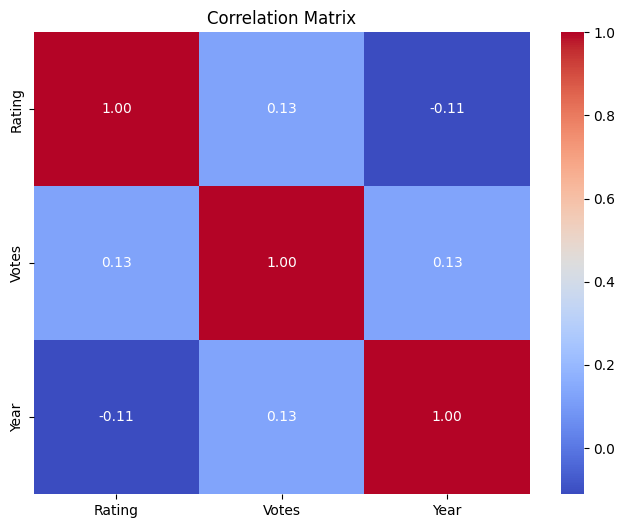

In [34]:
# Extracting unique genres
all_genres = ','.join(data['Genre'].dropna()).split(',')
unique_genres = set(all_genres)

# Count plot for genres
plt.figure(figsize=(10, 6))
sns.countplot(y='Genre', data=data, order=data['Genre'].value_counts().index[:20], palette='pastel')
plt.title('Top 20 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Average ratings for different genres
genre_ratings = {}
for genre in unique_genres:
    genre_ratings[genre] = data[data['Genre'].str.contains(genre)]['Rating'].mean()

# Plotting average ratings for genres
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_ratings.values()), y=list(genre_ratings.keys()), palette='pastel', orient='h')
plt.title('Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# Correlation matrix
correlation_matrix = data[['Rating', 'Votes', 'Year']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<ipython-input-35-2aca3aacbfa0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_ratings.values, y=director_ratings.index, palette='pastel', orient='h')


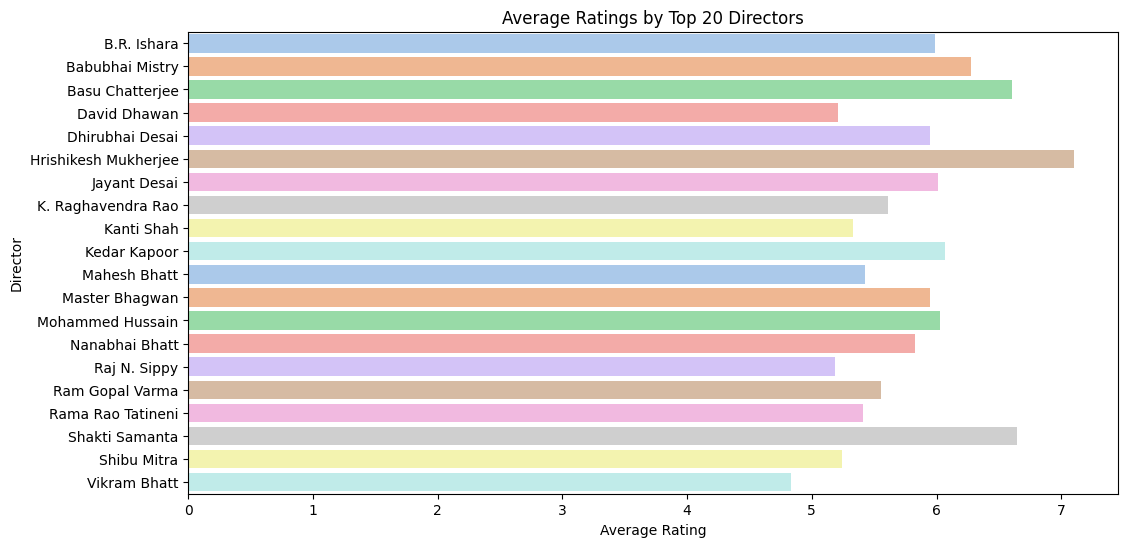

In [35]:
# Average ratings for top 20 directors
top_directors = data['Director'].value_counts().index[:20]
director_ratings = data[data['Director'].isin(top_directors)].groupby('Director')['Rating'].mean()

# Plotting average ratings for directors
plt.figure(figsize=(12, 6))
sns.barplot(x=director_ratings.values, y=director_ratings.index, palette='pastel', orient='h')
plt.title('Average Ratings by Top 20 Directors')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()


<ipython-input-36-070df7ac48f9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor1_ratings.values, y=actor1_ratings.index, palette='pastel', orient='h')


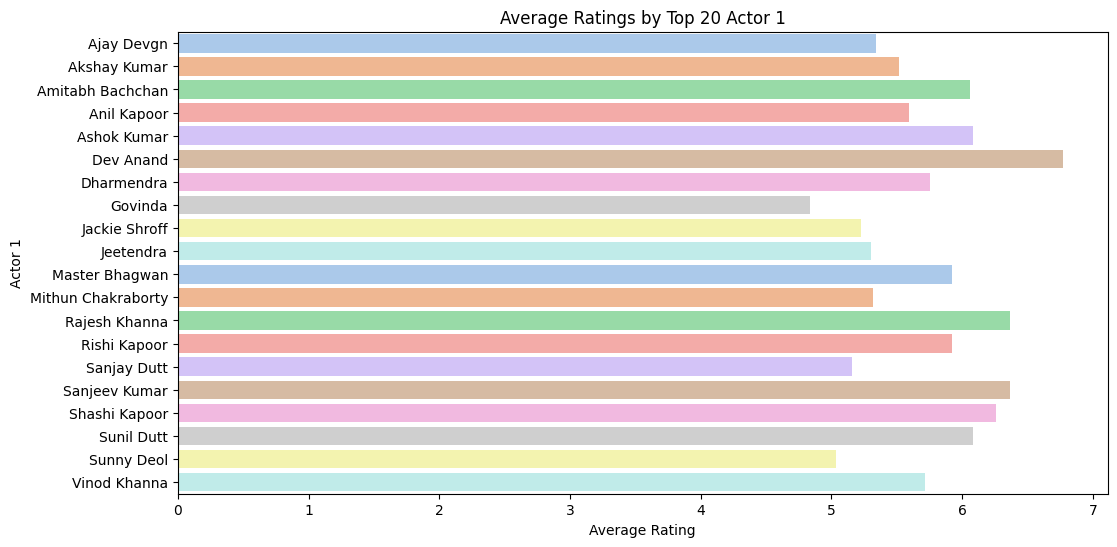

<ipython-input-36-070df7ac48f9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor2_ratings.values, y=actor2_ratings.index, palette='pastel', orient='h')


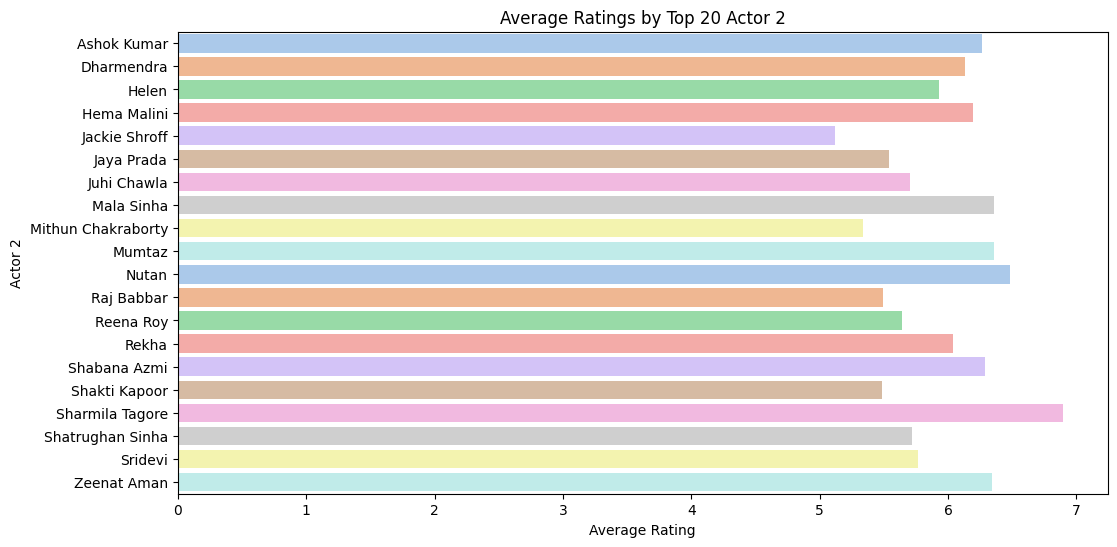

<ipython-input-36-070df7ac48f9>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor3_ratings.values, y=actor3_ratings.index, palette='pastel', orient='h')


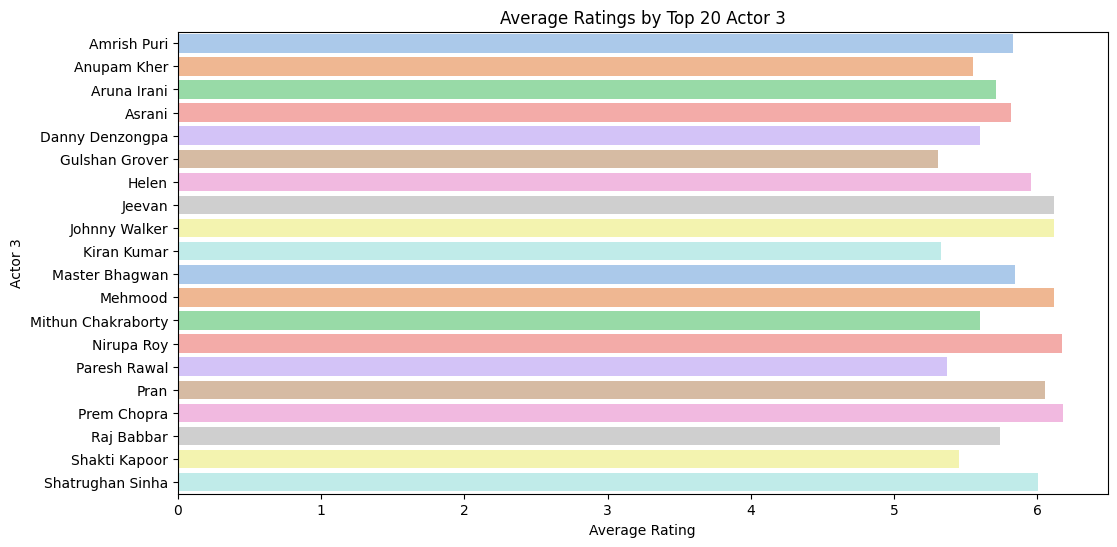

In [36]:
# Average ratings for top 20 actors in Actor 1
top_actors1 = data['Actor 1'].value_counts().index[:20]
actor1_ratings = data[data['Actor 1'].isin(top_actors1)].groupby('Actor 1')['Rating'].mean()

# Plotting average ratings for actors in Actor 1
plt.figure(figsize=(12, 6))
sns.barplot(x=actor1_ratings.values, y=actor1_ratings.index, palette='pastel', orient='h')
plt.title('Average Ratings by Top 20 Actor 1')
plt.xlabel('Average Rating')
plt.ylabel('Actor 1')
plt.show()

# Average ratings for top 20 actors in Actor 2
top_actors2 = data['Actor 2'].value_counts().index[:20]
actor2_ratings = data[data['Actor 2'].isin(top_actors2)].groupby('Actor 2')['Rating'].mean()

# Plotting average ratings for actors in Actor 2
plt.figure(figsize=(12, 6))
sns.barplot(x=actor2_ratings.values, y=actor2_ratings.index, palette='pastel', orient='h')
plt.title('Average Ratings by Top 20 Actor 2')
plt.xlabel('Average Rating')
plt.ylabel('Actor 2')
plt.show()

# Average ratings for top 20 actors in Actor 3
top_actors3 = data['Actor 3'].value_counts().index[:20]
actor3_ratings = data[data['Actor 3'].isin(top_actors3)].groupby('Actor 3')['Rating'].mean()

# Plotting average ratings for actors in Actor 3
plt.figure(figsize=(12, 6))
sns.barplot(x=actor3_ratings.values, y=actor3_ratings.index, palette='pastel', orient='h')
plt.title('Average Ratings by Top 20 Actor 3')
plt.xlabel('Average Rating')
plt.ylabel('Actor 3')
plt.show()


In [37]:
!pip install category_encoders
# Import necessary libraries
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

# Select features and target variable
features = ['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

# Drop rows with missing target variable
data = data.dropna(subset=[target])

# Separate features and target variable
X = data[features]
y = data[target]

# Encode categorical variables using Target Encoding
encoder = TargetEncoder(cols=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
X_encoded = encoder.fit_transform(X, y)

# Convert 'Year' and 'Duration' to numeric
X_encoded['Year'] = pd.to_numeric(X_encoded['Year'], errors='coerce').fillna(0).astype(int)
X_encoded['Duration'] = X_encoded['Duration'].str.extract('(\d+)').astype(float).fillna(0)

# Fill missing values in 'Votes' with 0 and convert to numeric
X_encoded['Votes'] = pd.to_numeric(X_encoded['Votes'], errors='coerce').fillna(0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Import necessary libraries for modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define a function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
xg = XGBRegressor(n_estimators=100, random_state=42)

# Evaluate models
mse_lr, r2_lr = evaluate_model(lr, X_train, y_train, X_test, y_test)
mse_rf, r2_rf = evaluate_model(rf, X_train, y_train, X_test, y_test)
mse_gb, r2_gb = evaluate_model(gb, X_train, y_train, X_test, y_test)
mse_xg, r2_xg = evaluate_model(xg, X_train, y_train, X_test, y_test)

# Print results
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")
print(f"Random Forest Regressor - MSE: {mse_rf}, R2: {r2_rf}")
print(f"Gradient Boosting Regressor - MSE: {mse_gb}, R2: {r2_gb}")
print(f"XGBoost Regressor - MSE: {mse_xg}, R2: {r2_xg}")


Linear Regression - MSE: 0.48828768179899773, R2: 0.4978580960729738
Random Forest Regressor - MSE: 0.2542360967117989, R2: 0.7385504439114845
Gradient Boosting Regressor - MSE: 0.271147283042202, R2: 0.7211594352537873
XGBoost Regressor - MSE: 0.2511945431041919, R2: 0.7416782957421777


#Interpretation

Linear Regression has the highest MSE and the lowest R2 score, indicating that it is the least effective model for this dataset.
Random Forest Regressor and Gradient Boosting Regressor both perform significantly better than Linear Regression, with Random Forest slightly outperforming Gradient Boosting.
XGBoost Regressor achieves the best performance with the lowest MSE (0.2512) and the highest R2 score (0.7417). This indicates that XGBoost explains about 74.17% of the variance in the movie ratings, making it the most accurate model among those tested.

#Conclusion

Given the evaluation metrics, XGBoost Regressor is the best model for predicting movie ratings in this dataset. It has the lowest MSE and the highest R2 score, demonstrating its superior predictive power compared to the other models.

    Feature  Importance
4  Director    0.444175
7   Actor 3    0.152212
3     Votes    0.133182
6   Actor 2    0.086105
5   Actor 1    0.076771
0      Year    0.058263
2     Genre    0.025822
1  Duration    0.023470


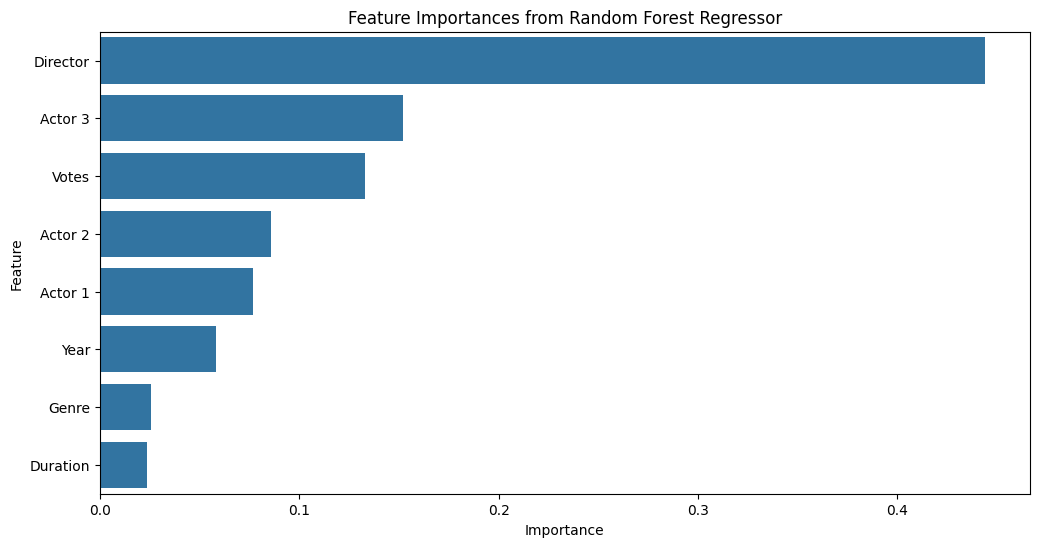

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the Random Forest model
feature_importances = xg.feature_importances_
features = X_train.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest Regressor')
plt.show()


In [39]:
# Import necessary libraries for saving the model
import joblib

# Retrain the XGBoost Regressor on the entire dataset
final_model = XGBRegressor(n_estimators=100, random_state=42)
final_model.fit(X_encoded, y)

# Save the model
joblib.dump(final_model, 'movie_rating_predictor.pkl')

# Example 1: Predict the rating of a new movie
new_movie = {
    'Year': 2023,
    'Duration': '150 min',
    'Genre': 'Action, Adventure',
    'Votes': 500,
    'Director': 'Christopher Nolan',
    'Actor 1': 'Leonardo DiCaprio',
    'Actor 2': 'Tom Hardy',
    'Actor 3': 'Joseph Gordon-Levitt'
}

# Convert new_movie to DataFrame
new_movie_df = pd.DataFrame([new_movie])

# Preprocess the new movie data
new_movie_df['Year'] = pd.to_numeric(new_movie_df['Year'], errors='coerce').fillna(0).astype(int)
new_movie_df['Duration'] = new_movie_df['Duration'].str.extract('(\d+)').astype(float).fillna(0)
new_movie_df['Votes'] = pd.to_numeric(new_movie_df['Votes'], errors='coerce').fillna(0).astype(int)

# Encode the categorical variables
new_movie_encoded = encoder.transform(new_movie_df)

# Predict the rating
predicted_rating = final_model.predict(new_movie_encoded)
print(f"Predicted Rating: {predicted_rating[0]}")



Predicted Rating: 5.614819049835205


In [40]:
# Example 2: Predict the rating of a new movie
new_movie = {
    'Year': 2023,
    'Duration': '150 min',
    'Genre': 'Action, Adventure',
    'Votes': 1200,
    'Director': 'Christopher Nolan',
    'Actor 1': 'Leonardo DiCaprio',
    'Actor 2': 'Tom Hardy',
    'Actor 3': 'Joseph Gordon-Levitt'
}

# Convert new_movie to DataFrame
new_movie_df = pd.DataFrame([new_movie])

# Preprocess the new movie data
new_movie_df['Year'] = pd.to_numeric(new_movie_df['Year'], errors='coerce').fillna(0).astype(int)
new_movie_df['Duration'] = new_movie_df['Duration'].str.extract('(\d+)').astype(float).fillna(0)
new_movie_df['Votes'] = pd.to_numeric(new_movie_df['Votes'], errors='coerce').fillna(0).astype(int)

# Encode the categorical variables
new_movie_encoded = encoder.transform(new_movie_df)

# Predict the rating
predicted_rating = final_model.predict(new_movie_encoded)
print(f"Predicted Rating: {predicted_rating[0]}")

Predicted Rating: 5.502730369567871


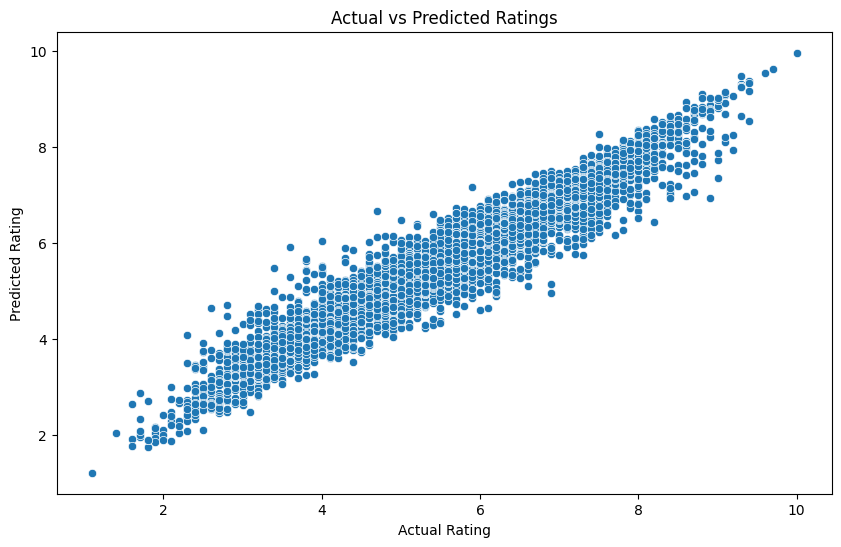

In [41]:
# Example: Compare actual and predicted values
predicted_values = final_model.predict(X_encoded)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Rating': y,
    'Predicted Rating': predicted_values
})

# Plot actual vs predicted ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Rating', y='Predicted Rating', data=comparison_df)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()
